# Disagg gene candidates enrichment

In [1]:
import os
import sys
from importlib import reload

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.insert(0,module_path)
    
import warnings

import pandas as pd
from IPython.display import display
pd.set_option('max_colwidth', 70)
pd.set_option('display.max_rows', 500)
import string
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'figure.max_open_warning': 0})

from orangecontrib.bioinformatics.geneset.__init__ import list_all

import jupyter_functions as jf
reload(jf)
import jupyter_functions as jf
from networks.functionsDENet import loadPickle, savePickle
import stages_DE.enrichment_library as enr
reload(enr)
import stages_DE.enrichment_library as enr

In [6]:
#Path for expression data (mergedGenes_RPKUM.tsv)
dataPath='/home/karin/Documents/timeTrajectories/data/RPKUM/combined/'
#Path for results
pathDisag='/home/karin/Documents/timeTrajectories/data/stages/disagg/impulse/'


In [32]:
# Get all gene sets
gene_sets=list(list_all(organism='44689'))
GENE_SETS_ONTOLOGY=enr.get_gene_sets(gene_set_names=gene_sets, go_slims=True,set_sizes=(5,500))
# Find out max/min gene set sizes and N sets
max_n=0
min_n=np.inf
for k,v in GENE_SETS_ONTOLOGY.items():
    for s in v:
        n=len(s.genes)
        if n<min_n:
            min_n=n
        if n>max_n:
            max_n=n
print('Min size',min_n,'Max size',max_n)  
print('N sets',{k:len(v) for k,v in GENE_SETS_ONTOLOGY.items()})

genes = pd.read_csv(dataPath + 'mergedGenes_RPKUM.tsv', sep='\t', index_col=0)
all_gene_names= genes[(genes != 0).any(axis=1)].index
NAME_EID=enr.name_genes_entrez(gene_names=all_gene_names, key_entrez=False)
ALL_GENE_NAMES_EID=enr.convert_EID(genes=all_gene_names, name_EID=NAME_EID)

Min size 5 Max size 495
N sets {('GO', 'cellular_component'): 24, ('Custom', 'Baylor'): 15, ('KEGG', 'Pathways'): 96, ('GO', 'biological_process'): 52, ('GO', 'molecular_function'): 35, ('Dictybase', 'Phenotypes'): 209}


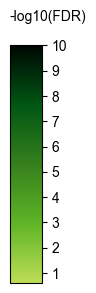

In [33]:
#Result filtering
MAX_FDR_DE=0.01
MIN_ABS_LFC_DE=2
MAX_N_SIGNIFICANT_DE=2
#Enrichment
PADJ=0.25
MIN_OVERLAP=2
MAX_FE_BAR=80
MIN_FDR_BAR=10**(-10)
LFDR_BASE_BAR=10
# Any colour map from https://matplotlib.org/tutorials/colors/colormaps.html
#CMAP_FDR_BAR='gnuplot'
CMAP_FDR_BAR=['#bede57','#5fb526','#36801d','#015713','#000803']

%matplotlib agg
fig,ax=enr.plot_legend_enrichment_bar(cmap=CMAP_FDR_BAR, min_FDR=MIN_FDR_BAR,used_padj=PADJ,base=LFDR_BASE_BAR)
display(fig)

## Sigmoid models based disag genes
Genes were selected if more complex model was fitted in disagg strain compared to WT. Genes were further filtered based on strength of modelled expression changes and starting state in WT vs disag - local min or max of expression (will be described in the Explanations file). 

***  tgrB1 selected: 1658 with EID: 1650
Genes annotated with a gene set in reference 37.8% and group 46.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 471 out of 759 group genes used for enrichment calculation.


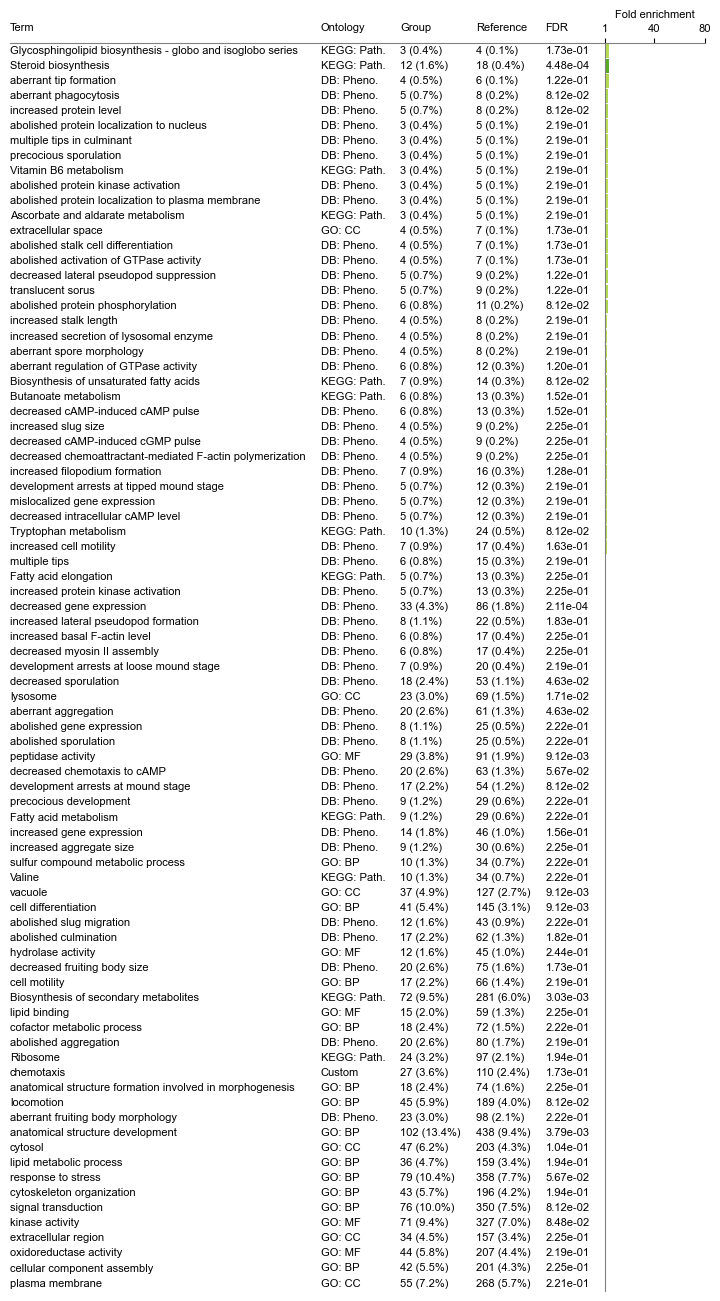

***  tgrB1C1 selected: 1180 with EID: 1174
Genes annotated with a gene set in reference 37.8% and group 47.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 250 out of 556 group genes used for enrichment calculation.


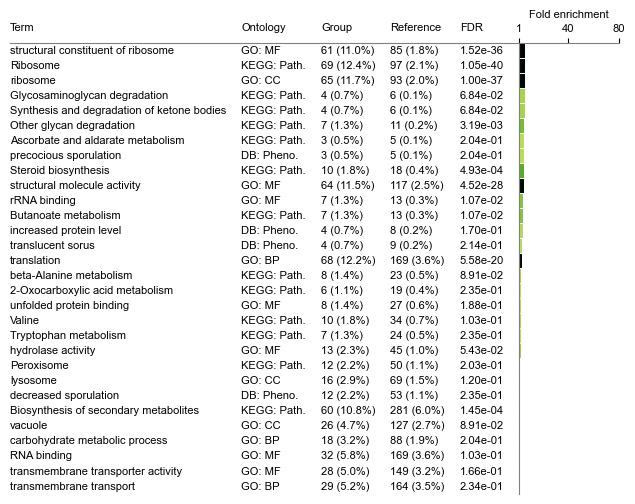

***  tgrC1 selected: 10 with EID: 10
Genes annotated with a gene set in reference 37.8% and group 40.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 2 out of 4 group genes used for enrichment calculation.


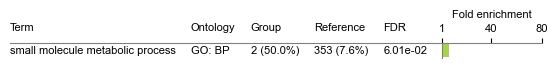

***  gbfA selected: 63 with EID: 63
Genes annotated with a gene set in reference 37.8% and group 49.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 2 out of 31 group genes used for enrichment calculation.


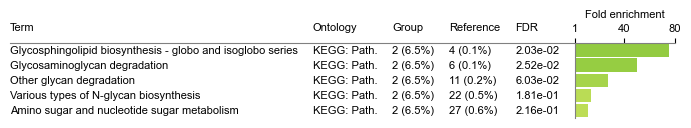

In [34]:
%matplotlib agg
figs=[]
for strain in ['tgrB1','tgrB1C1','tgrC1','gbfA']:
    query_data=pd.read_table(pathDisag+'filteredGenes_diffT0.1_'+strain+'.tsv',index_col=0)
    query_names=query_data.query('filterNLargeDiff & filterStartState ').index
    enriched=enr.group_diff_enrichment(query_names=query_names,
                                       group=strain,
                                       name_eid=NAME_EID,all_gene_names_eid=ALL_GENE_NAMES_EID, 
                                       gene_sets_ontology=GENE_SETS_ONTOLOGY,
                                       use_annotated_genes=True,
                                       min_overlap=MIN_OVERLAP,padj=PADJ,
                                       make_enrichment_bar=True,
                                       max_FE_bar=MAX_FE_BAR, min_FDR_bar=MIN_FDR_BAR,cmap_FDR_bar=CMAP_FDR_BAR,
                                       lFDR_base_bar=LFDR_BASE_BAR
                                      )
    figs.append(enriched[1])
    display(enriched[1][0])
plt.close('all')    